### Imports

In [120]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [121]:
# Clean up the data
_ = pd.read_csv('./data/SOC_OCV_MFCTT_2019.csv', sep='\t', names=['SOC', 'Ecell/V'], skiprows=1).astype(float)
_.to_csv('./data/SOC_OCV_MFCTT_2019_delim.csv', index=False)

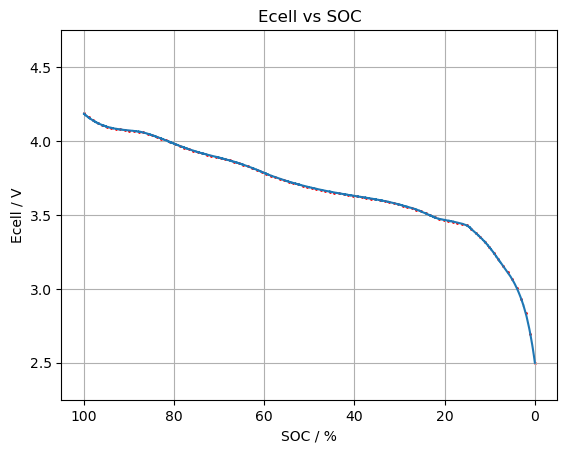

0% SOC: 2.5 V
20% SOC: 3.47 V
50% SOC: 3.69 V
80% SOC: 3.98 V
100% SOC: 4.19 V


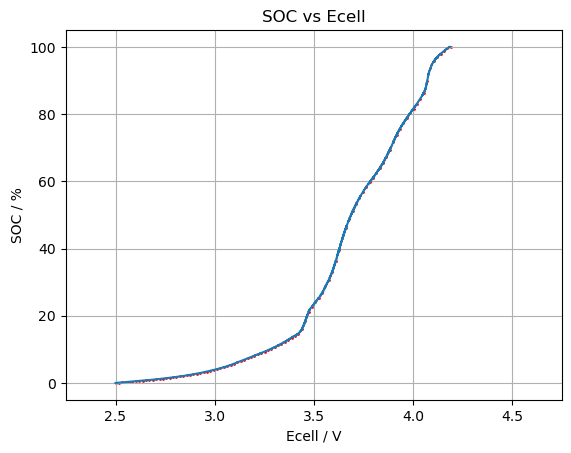

In [122]:
# Load the cleaned OCV_data csv file
OCV_data = pd.read_csv('./data/SOC_OCV_MFCTT_2019_delim.csv')
SOC_data = OCV_data['SOC'].values
Ecell_data = OCV_data['Ecell/V'].values

def get_Ecell(SOC):
    SOC_array = np.array(SOC)
    if np.any(SOC_array < 0) or np.any(SOC_array > 100):
        raise ValueError('SOC must be between 0 and 100')
    return np.interp(SOC_array, SOC_data[::-1], Ecell_data[::-1]) # Reverse the data so that it is increasing because np.interp requires that

def get_SOC(Ecell):
    Ecell_array = np.array(Ecell)
    return np.interp(Ecell_array, Ecell_data[::-1], SOC_data[::-1])

SOC_interp = np.linspace(0, 100, 100)
Ecell_interp = get_Ecell(SOC_interp)

# Plot
plt.plot(OCV_data['SOC'], OCV_data['Ecell/V'])
plt.scatter(SOC_interp, Ecell_interp, s=1, c='r')
plt.gca().invert_xaxis()
plt.xlabel('SOC / %')
plt.ylabel('Ecell / V')
plt.ylim(2.25, 4.75)
plt.title('Ecell vs SOC')
plt.grid()
plt.show()

# Print points of interest
print(f"0% SOC: {round(get_Ecell(0), 2)} V")
print(f"20% SOC: {round(get_Ecell(20), 2)} V")
print(f"50% SOC: {round(get_Ecell(50), 2)} V")
print(f"80% SOC: {round(get_Ecell(80), 2)} V")
print(f"100% SOC: {round(get_Ecell(100), 2)} V")

# Plot
Ecell_interp = np.linspace(2.5, 4.19, 100)
SOC_interp = get_SOC(Ecell_interp)

plt.plot(OCV_data['Ecell/V'], OCV_data['SOC'])
plt.scatter(Ecell_interp, SOC_interp, s=1, c='r')
plt.xlabel('Ecell / V')
plt.ylabel('SOC / %')
plt.xlim(2.25, 4.75)
plt.title('SOC vs Ecell')
plt.grid()
plt.show()

In [123]:
# Load data
BT_data = pd.read_csv('./data/Battery_Testing_Data.csv')
BT_data = BT_data.dropna() # Drop NaN values in the first row
BT_data

,Time (s),Current (mA),Voltage (V),Temperature
1,1.0,0.0,4.05,21.96
2,2.0,0.0,4.05,21.94
3,3.0,0.0,4.05,21.94
4,4.0,0.0,4.05,21.93
5,5.0,0.0,4.05,21.93
...,...,...,...,...
23427,23427.0,0.0,3.58,20.13
23428,23428.0,0.0,3.58,20.13
23429,23429.0,0.0,3.58,20.13
23430,23430.0,0.0,3.58,20.13


Text(0.5, 1.0, 'Current vs Time')

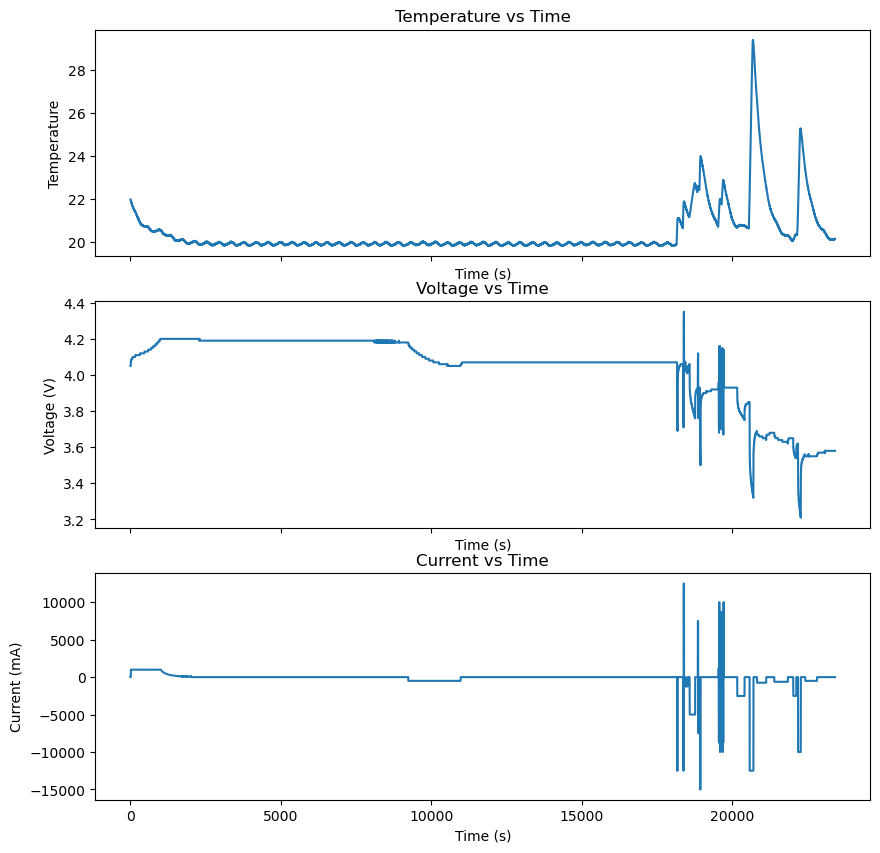

In [124]:
# plot three subplots
fig, axs = plt.subplots(3, 1, figsize=(10, 10), sharex=True)
axs[0].plot(BT_data['Time (s)'], BT_data['Temperature'])
axs[0].set_xlabel('Time (s)')
axs[0].set_ylabel('Temperature')
axs[0].set_title('Temperature vs Time')

axs[1].plot(BT_data['Time (s)'], BT_data['Voltage (V)'])
axs[1].set_xlabel('Time (s)')
axs[1].set_ylabel('Voltage (V)')
axs[1].set_title('Voltage vs Time')

axs[2].plot(BT_data['Time (s)'], BT_data['Current (mA)'])
axs[2].set_xlabel('Time (s)')
axs[2].set_ylabel('Current (mA)')
axs[2].set_title('Current vs Time')


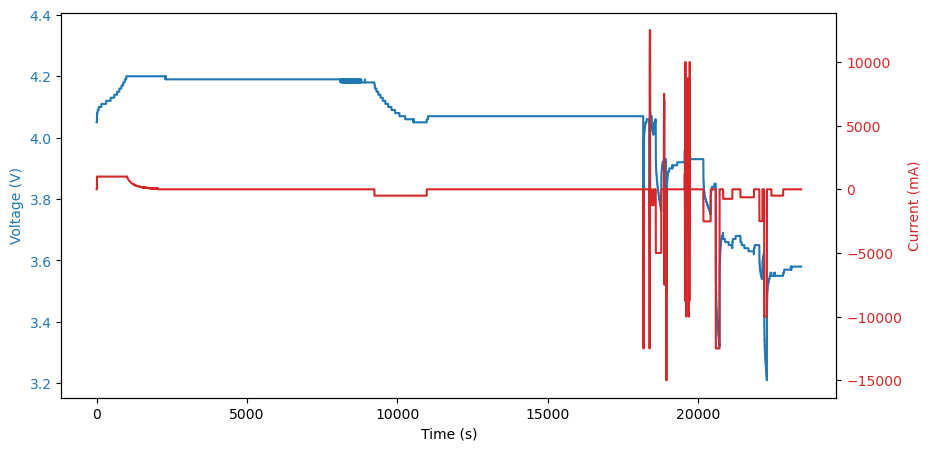

In [125]:
# plot voltage and current in the same plot
fig, ax1 = plt.subplots(figsize=(10, 5))
color = 'tab:blue'
ax1.set_xlabel('Time (s)')
ax1.set_ylabel('Voltage (V)', color=color)
ax1.plot(BT_data['Time (s)'], BT_data['Voltage (V)'], color=color)
ax1.tick_params(axis='y', labelcolor=color)

ax2 = ax1.twinx()
color = 'tab:red'
ax2.set_ylabel('Current (mA)', color=color)
ax2.plot(BT_data['Time (s)'], BT_data['Current (mA)'], color=color)
ax2.tick_params(axis='y', labelcolor=color)

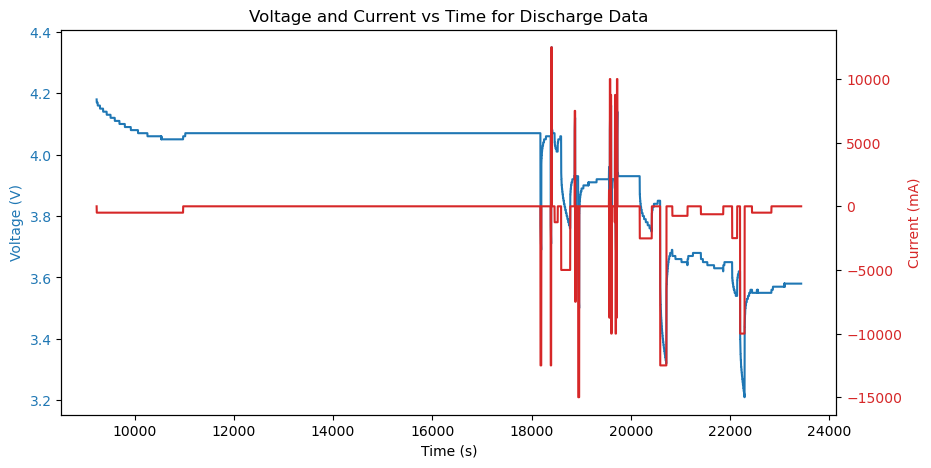

In [126]:
# BT_discharge data
BT_discharge = BT_data[BT_data['Time (s)'] >= 9237]

# plot voltage and current in the same plot
fig, ax1 = plt.subplots(figsize=(10, 5))
color = 'tab:blue'
ax1.set_xlabel('Time (s)')
ax1.set_ylabel('Voltage (V)', color=color)
ax1.plot(BT_discharge['Time (s)'], BT_discharge['Voltage (V)'], color=color)
ax1.tick_params(axis='y', labelcolor=color)

ax2 = ax1.twinx()
color = 'tab:red'
ax2.set_ylabel('Current (mA)', color=color)
ax2.plot(BT_discharge['Time (s)'], BT_discharge['Current (mA)'], color=color)
ax2.tick_params(axis='y', labelcolor=color)

plt.title('Voltage and Current vs Time for Discharge Data')
plt.show()

Starting SOC: 99.83 %
Starting charge: 8804.68 C


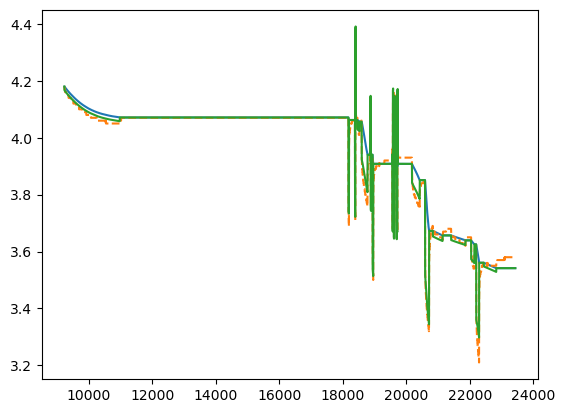

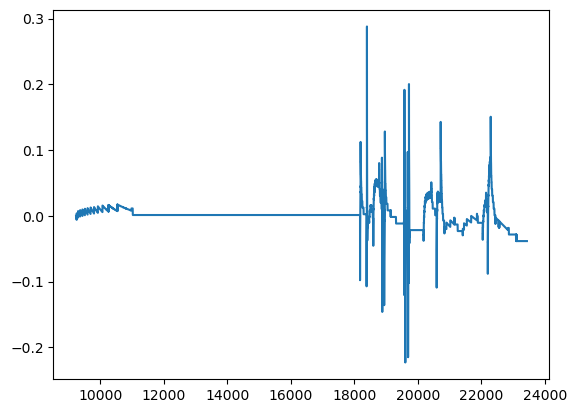

MSE: 0.0003068080884555362


In [159]:
CAPACITY = 2450 # mAh
CAPACITY_C = CAPACITY * 3.6 # Coulombs

SOC_START = get_SOC(BT_discharge['Voltage (V)'].iloc[0])/100
print(f"Starting SOC: {round(SOC_START*100, 2)} %")

charge = CAPACITY * SOC_START * 3.6 # Coulombs
print(f"Starting charge: {round(charge, 2)} C")

current_data = BT_discharge['Current (mA)'].values

DT = 1 # s
charge_exp = [charge]
for i in range(1, len(current_data)):
    charge += current_data[i]/1000 * DT  # Coulombs
    charge_exp.append(charge)
charge_exp = np.array(charge_exp)
    
time_data = BT_discharge['Time (s)'].values
# plt.plot(time_data, charge_exp)
# plt.show()

SOC_exp = charge_exp/CAPACITY_C*100
# plt.plot(time_data, SOC_exp)
# plt.show()

Ecell_exp = get_Ecell(SOC_exp)

R0 = 0.0263 # Ohms
v_exp = Ecell_exp + current_data * R0 / 1000 # V

plt.plot(time_data, Ecell_exp)
plt.plot(time_data, BT_discharge['Voltage (V)'], linestyle='--')
plt.plot(time_data, v_exp)
plt.show()

error_exp = (v_exp - BT_discharge['Voltage (V)'])
plt.plot(time_data, error_exp)
plt.show()

mse = np.mean(error_exp**2)
print(f"MSE: {mse}")


### Other

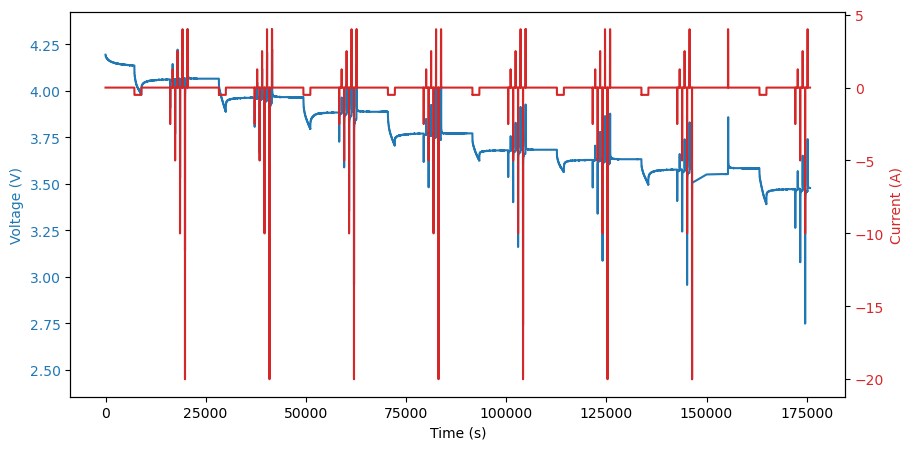

In [ ]:
T0data = pd.read_csv('./data/Model_Training_Data_0.csv')

# plot current and voltage in the same plot
fig, ax1 = plt.subplots(figsize=(10, 5))
color = 'tab:blue'
ax1.set_xlabel('Time (s)')
ax1.set_ylabel('Voltage (V)', color=color)
ax1.plot(T0data['Time (s)'], T0data['Voltage (V)'], color=color)
ax1.tick_params(axis='y', labelcolor=color)

ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis
color = 'tab:red'
ax2.set_ylabel('Current (A)', color=color)  # we already handled the x-label with ax1
ax2.plot(T0data['Time (s)'], T0data['Current (A)'], color=color)
ax2.tick_params(axis='y', labelcolor=color)

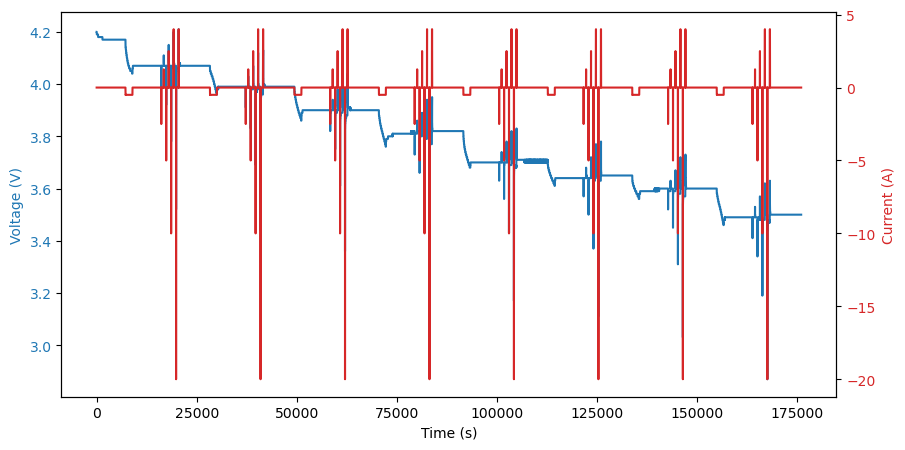

In [ ]:
T0data = pd.read_csv('./data/Model_Training_Data_20.csv')

# plot current and voltage in the same plot
fig, ax1 = plt.subplots(figsize=(10, 5))
color = 'tab:blue'
ax1.set_xlabel('Time (s)')
ax1.set_ylabel('Voltage (V)', color=color)
ax1.plot(T0data['Time (s)'], T0data['Voltage (V)'], color=color)
ax1.tick_params(axis='y', labelcolor=color)

ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis
color = 'tab:red'
ax2.set_ylabel('Current (A)', color=color)  # we already handled the x-label with ax1
ax2.plot(T0data['Time (s)'], T0data['Current (A)'], color=color)
ax2.tick_params(axis='y', labelcolor=color)

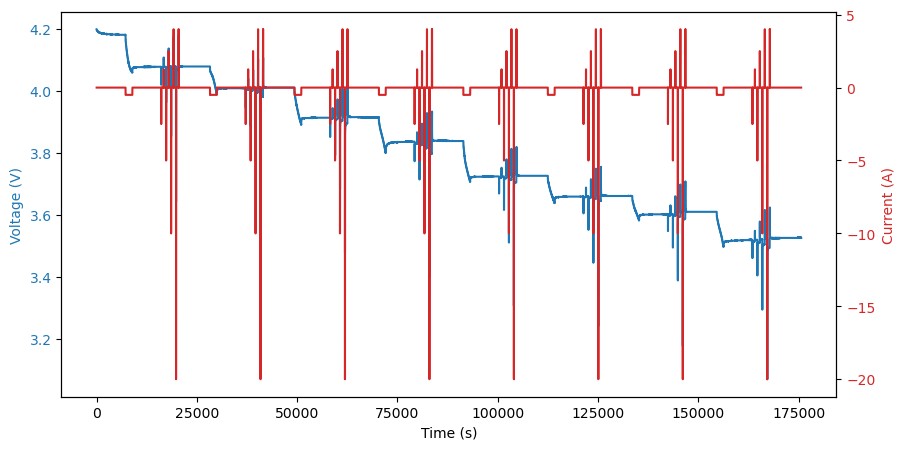

In [ ]:
T0data = pd.read_csv('./data/Model_Training_Data_40.csv')

# plot current and voltage in the same plot
fig, ax1 = plt.subplots(figsize=(10, 5))
color = 'tab:blue'
ax1.set_xlabel('Time (s)')
ax1.set_ylabel('Voltage (V)', color=color)
ax1.plot(T0data['Time (s)'], T0data['Voltage (V)'], color=color)
ax1.tick_params(axis='y', labelcolor=color)

ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis
color = 'tab:red'
ax2.set_ylabel('Current (A)', color=color)  # we already handled the x-label with ax1
ax2.plot(T0data['Time (s)'], T0data['Current (A)'], color=color)
ax2.tick_params(axis='y', labelcolor=color)